In [84]:
import pandas as pd
import numpy as np

df = pd.read_excel('21-02-28_19__API.xlsx', index_col = 0)
df

,등록일시분초,수정일시분초,"구분(성별, 연령별)",확진자,사망자,확진률,사망률,치명률,"확진자 성별, 연령별 고유값"
0,2020-04-02 19:02:48.480,0,남성,3905,82,39.90,50.62,2.10,1
1,2020-04-02 19:02:48.480,0,여성,5881,80,60.10,49.38,1.36,2
2,2020-04-02 19:02:48.480,0,80 이상,442,82,4.52,50.62,18.55,3
3,2020-04-02 19:02:48.480,0,70-79,651,46,6.65,28.40,7.07,4
4,2020-04-02 19:02:48.480,0,60-69,1235,22,12.62,13.58,1.78,5
...,...,...,...,...,...,...,...,...,...
3571,2021-02-28 14:21:42.561,0,40-49,12855,14,14.33,0.87,0.11,7158
3572,2021-02-28 14:21:42.561,0,30-39,11711,6,13.06,0.37,0.05,7159
3573,2021-02-28 14:21:42.561,0,20-29,13542,1,15.10,0.06,0.01,7160
3574,2021-02-28 14:21:42.561,0,10-19,6031,0,6.73,0.00,0.00,7161


In [38]:
df_남성 = df[df['구분(성별, 연령별)'] == '남성']
df_남성_확진률 = list(df_남성['확진률'])
np.mean(df_남성_확진률)

45.3932

In [39]:
df_여성 = df[df['구분(성별, 연령별)'] == '여성']
df_여성_확진률 = list(df_여성['확진률'])
np.mean(df_여성_확진률)

54.6068

In [40]:
df_남성_치명률 = list(df_남성['치명률'])
np.mean(df_남성_치명률)

2.1996307692307697

In [41]:
df_여성_치명률 = list(df_여성['치명률'])
np.mean(df_여성_치명률)

1.6471692307692312

In [ ]:
import scipy.stats

In [35]:
scipy.stats.ttest_ind(df_남성_확진률, df_여성_확진률, equal_var=False)

Ttest_indResult(statistic=-40.57833025993995, pvalue=4.456202100653829e-180)

In [30]:
scipy.stats.ttest_ind(df_남성_치명률, df_여성_치명률, equal_var=False)

Ttest_indResult(statistic=18.553056132921736, pvalue=1.583043559538735e-56)

C:\Users\HMB\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\HMB\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\HMB\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\HMB\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\HMB\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\HMB\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51060 missing from current font.

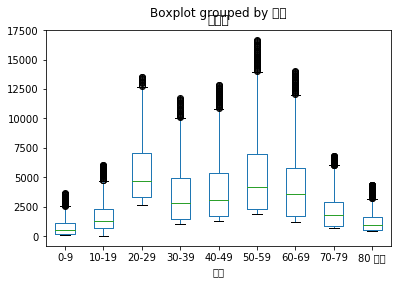

In [79]:
test = df[(df['구분(성별, 연령별)'] != '남성') & (df['구분(성별, 연령별)'] != '여성')][['구분(성별, 연령별)', '확진자']]
test.columns = ['구분', '확진자']
test.boxplot(column = '확진자', by='구분' , grid = False)

In [83]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('확진자 ~ C(구분)', test).fit()
print(anova_lm(model))

              df        sum_sq       mean_sq           F         PR(>F)
C(구분)        8.0  8.820584e+09  1.102573e+09  128.721701  2.929382e-185
Residual  2916.0  2.497716e+10  8.565556e+06         NaN            NaN


In [43]:
df['구분(성별, 연령별)'].unique()

array(['남성', '여성', '80 이상', '70-79', '60-69', '50-59', '40-49', '30-39',
       '20-29', '10-19', '0-9'], dtype=object)

In [60]:
연령 = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80 이상']

df_확진자_연령 = pd.DataFrame()
for old in 연령:
    df_확진자_연령[old] = pd.DataFrame(df[df['구분(성별, 연령별)'] == old]['확진자']).reset_index(drop=True, inplace=False)['확진자']

df_확진자_연령

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80 이상
0,112,515,2656,1012,1312,1851,1235,651,442
1,126,544,2819,1092,1382,1909,1304,689,466
2,126,548,2832,1102,1387,1915,1312,692,470
3,128,552,2844,1109,1394,1917,1314,692,473
4,129,553,2851,1113,1396,1920,1320,694,474
...,...,...,...,...,...,...,...,...,...
320,3551,5913,13310,11461,12616,16403,13816,6721,4329
321,3575,5944,13372,11529,12683,16471,13862,6740,4340
322,3588,5972,13428,11596,12741,16550,13928,6764,4355
323,3610,6002,13496,11667,12800,16618,13977,6787,4364


In [86]:
for old in 연령:
    print(old, ":", np.mean(df_확진자_연령[old]))

0-9 : 934.9015384615385
10-19 : 1869.8246153846153
20-29 : 5768.710769230769
30-39 : 3877.0738461538463
40-49 : 4305.704615384615
50-59 : 5719.52
60-69 : 4706.48
70-79 : 2346.889230769231
80 이상 : 1429.8153846153846


In [87]:
df_확진자_연령[-1:]

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80 이상
324,3622,6031,13542,11711,12855,16697,14029,6812,4377


C:\Users\HMB\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\HMB\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\HMB\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\HMB\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\HMB\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\HMB\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45224 missing from current font.

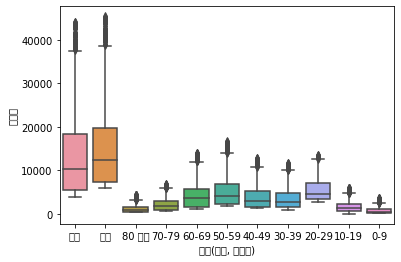

In [68]:
import matplotlib.pyplot as plt

import seaborn as sns


sns.boxplot(x="구분(성별, 연령별)", 

            y="확진자", 

            data=df)

plt.show()

